In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Đọc hai hình ảnh đầu vào
image1 = cv2.imread('re1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('re2.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Tìm điểm chưa chung giữa các keypoint
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)


In [ ]:
# Sử dụng thuật toán RANSAC để tìm ánh xạ giữa các điểm chưa chung
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

In [ ]:
# Chọn ra các điểm tốt nhất
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:10]  # Lấy 10 điểm tốt nhất

In [ ]:
# Lấy ra các điểm tương ứng từ keypoint
points1 = np.float32([keypoints1[match.queryIdx].pt for match in good_matches])
points2 = np.float32([keypoints2[match.trainIdx].pt for match in good_matches])

In [ ]:
# Tìm ma trận biến đổi (homography) bằng phương pháp RANSAC
homography, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

In [ ]:
# Ánh xạ hình ảnh sử dụng ma trận biến đổi
result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))

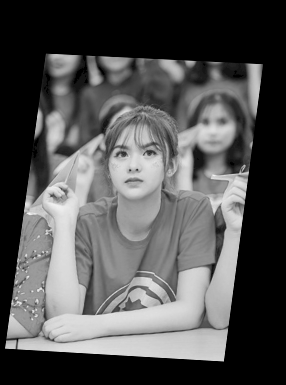

In [3]:
# Hiển thị hình ảnh đã đăng ký
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()
